In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

id : 샘플 아이디

Year_Birth : 고객 생년월일

Education : 고객 학력

Marital_status : 고객 결혼 상태


Income : 고객 연간 가구 소득

Kidhome : 고객 가구의 자녀 수

Teenhome : 고객 가구의 청소년 수

Dt_Customer : 고객이 회사에 등록한 날짜

Recency : 고객의 마지막 구매 이후 일수

NumDealsPurchases : 할인된 구매 횟수

NumWebPurchases : 회사 웹사이트를 통한 구매 건수

NumCatalogPurchases : 카탈로그를 사용한 구매 수 

NumStorePuchases : 매장에서 직접 구매한 횟수

NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수

AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 
0

AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 
0

AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0

AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0

AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0

Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0

Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0

target : 고객의 제품 총 소비량

In [ ]:
train.describe()

,id,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841
std,319.996354,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,276.750000,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000
50%,553.500000,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000
75%,830.250000,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000
max,1107.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

In [ ]:
train.isnull().sum()

id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
target                 0
dtype: int64

In [ ]:
test.isnull().sum()

id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [ ]:
train.head(10)

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444
5,5,1952,Graduation,Single,47958.0,0,1,19-01-2013,8,2,...,5,5,0,0,0,0,0,0,0,407
6,6,1971,Graduation,Single,22804.0,1,0,31-07-2013,75,1,...,2,9,0,0,0,0,0,0,0,26
7,7,1978,Graduation,Widow,54162.0,1,1,18-03-2013,31,1,...,3,4,0,0,0,0,0,0,0,42
8,8,1968,Graduation,Married,45688.0,0,1,25-01-2014,20,2,...,8,4,0,1,0,0,0,0,0,306
9,9,1952,Graduation,Single,61823.0,0,1,18-02-2013,26,4,...,10,7,0,0,0,0,0,0,0,884


In [ ]:
categorical_features = [col for col in train.columns if train[col].dtype == 'object']
numerical_features = [col for col in train.columns if train[col].dtype == 'int64']

In [ ]:
len(categorical_features)

3

In [ ]:
len(numerical_features)

18

In [ ]:
categorical_features

['Education', 'Marital_Status', 'Dt_Customer']

In [ ]:
train['Education'].unique()

array(['Master', 'Graduation', 'Basic', 'PhD', '2n Cycle'], dtype=object)

Master : 석사

Graduation : 학사

Basic : 고졸

PhD : 박사

2n Cycle : 중졸

In [ ]:
train.value_counts('Education')

Education
Graduation    570
PhD           254
Master        173
2n Cycle       89
Basic          22
dtype: int64

In [ ]:
pd.crosstab(index = [train.Education], columns = train.AcceptedCmp1, values = train.Income, aggfunc = np.mean, margins = True).fillna(0)

AcceptedCmp1,0,1,All
Education,,,
2n Cycle,46035.450000,78587.444444,49327.224719
Basic,18781.181818,0.000000,18781.181818
Graduation,49183.501887,77923.050000,51200.312281
Master,53143.115854,82592.777778,54675.179191
PhD,54607.915254,75902.000000,56116.944882
All,50161.062984,78076.052632,52075.809567


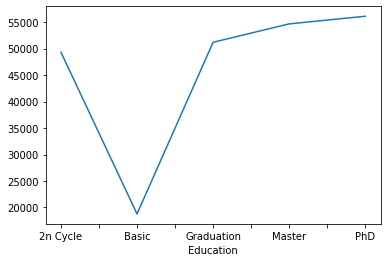

In [ ]:
train.groupby(['Education'])['Income'].mean().plot()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train['Education'])
Lable = encoder.transform(train['Education'])
train['Education'] = Lable

In [ ]:
train['Marital_Status'].unique()

array(['Together', 'Single', 'Married', 'Widow', 'Divorced', 'Alone',
       'YOLO', 'Absurd'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train['Education'])
Lable = encoder.transform(train['Education'])
train['Education'] = Lable

In [ ]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.Dt_Customer:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

day, month, year = seperate_datetime(train)
    
train['year'] = year
train['month'] = month
train['day'] = day

In [ ]:
numerical_features

['id',
 'Year_Birth',
 'Kidhome',
 'Teenhome',
 'Recency',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'target']

In [ ]:
df_train = train.copy()
df_test = test.copy()

In [ ]:
from collections import Counter

n_fts = ['Year_Birth',
 'Kidhome',
 'Teenhome',
 'Recency',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']
train_outlier_ind = []
for i in n_fts:
  Q1 = np.percentile(df_train[i],25)
  Q3 = np.percentile(df_train[i],75)
  IQR = Q3-Q1
  train_outlier_list = df_train[(df_train[i] < Q1 - IQR * 1.5) | (df_train[i] > Q3 + IQR * 1.5)].index
  train_outlier_ind.extend(train_outlier_list)

train_outlier_ind = Counter(train_outlier_ind)
train_multi_outliers = list(k for k,j in train_outlier_ind.items() if j > 2)  

print("The number of train outliers :", len(train_multi_outliers))

The number of train outliers : 53


In [ ]:
#skewness 탐색
print(df_train[n_fts].skew())

Year_Birth             -0.439100
Kidhome                 0.766098
Teenhome                0.438822
Recency                -0.061310
NumDealsPurchases       2.264245
NumWebPurchases         1.289607
NumCatalogPurchases     1.099499
NumStorePurchases       0.653689
NumWebVisitsMonth       0.299000
AcceptedCmp3            3.390488
AcceptedCmp4            2.963226
AcceptedCmp5            3.310209
AcceptedCmp1            3.418218
AcceptedCmp2            7.896889
Complain               10.397197
Response                2.057638
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

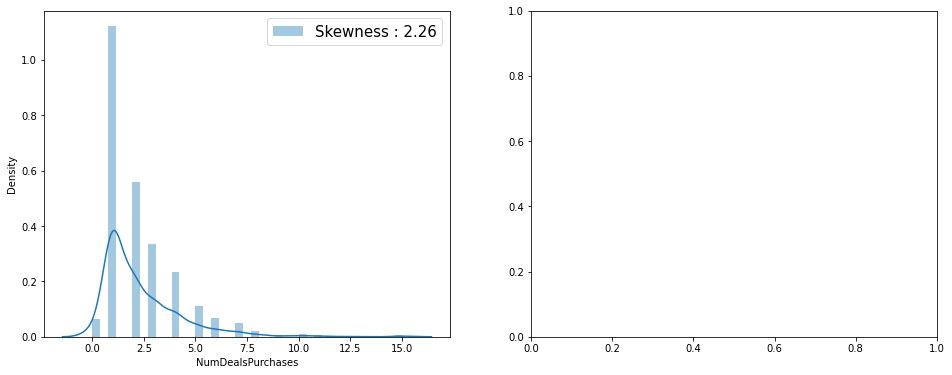

In [ ]:
fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(df_train['NumDealsPurchases'], ax = ax1, label='Skewness : {:.2f}'.format(df_train['NumDealsPurchases'].skew()))
ax1.legend(loc='best', fontsize = 15)

stats.probplot(df_train['NumDealsPurchases'], plot = ax2)
plt.title("Q-Q Plot", fontsize = 15)
plt.show()

In [ ]:
train = train.drop('Dt_Customer', axis = 1)